# Python Machine Learning - Code Examples

# Data Pre-Processing
# 

### Overview


- [Organizing Training and Test sets](#Organizing-Training-and-Test-sets)
    - [hold-out](#hold-out)
   - [Example: Normalization](#normalization)

- [Ranking Features](#Ranking-Features)
    - [univariate methods](#univariate-methods)
-[Feature Selection](#feature-selection)
    - [Pearson's correlation coefficient](#Pearson's-correlation-coefficient)     
    


In [7]:
#from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
#other library for graphs
import seaborn as sns

In [8]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Partitioning a dataset in training and test sets

Usually the data is stored into one file. Then after reading is needed to organize the data into two subsets.
1. The basic strategy is the hold out method. 
2. The percentage of members in both classes are kept in the division.

![title](FIG/bloco.png)

#### Remark:  Understanding the scikit-learn estimator API

 To evaluate correctly a methodology at least two distinct data sets are used:
1.  The training set: where all parameters of the model are learned. Even the pre-processing step parameters. The "fit" of the model of the transformation is achieved with this data set.
2. Afterwards  both sets ( training and test ) are  transformed. 


In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv("wdbcBBB.csv",header = 0)
df.head()

,ID,diagnosis,r-mean,t-mean,per-mean,ar-mean,sm-mean,cm-mean,cn-mean,nc-mean,...,r-w,t-w,per-w,ar-w,sm-w,cm-w,cn-w,nc-w,sym-w,fc-w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# NOTE most of the commands need the data as matrix.
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
dummy=df.values

y=dummy[:,1]
print(y.shape)

X=dummy[:,2:]
print(X.shape)

(569,)
(569, 30)


In [11]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    
    
#label   reading from a data frame to a 
#y=df.as_matrix(columns=[df.columns[0]])

# features
#X=df2.as_matrix(columns=df.columns[1:])

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)
    

## Example  of how to use the  two partitions
#### Normalization of the features
1. Train: fit and transform
2. Test: transform (using the parameters estimated on fit).


In [12]:
# Hints to apply to the data matrix
from sklearn.preprocessing import MinMaxScaler
# Data should be in matrices
mms = MinMaxScaler()
# Train fit and transform. Test only transform.
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [13]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Ranking Features

In classification problems it can be relevant to have an idea how features values are distinct according to some criteria with the classes.

#### Univariate Feature Selection

Univariate feature selection selects the best features by running univariate statistical tests like **chi-squared test, F-test, and mutual information** methods.

In [14]:
# Possible packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

In [15]:
# EXAMPLE
### ANOVA..... f_classif option
from sklearn.feature_selection import SelectKBest, f_classif

N=30

k_bestfeatures = SelectKBest(score_func = f_classif)
rankings = k_bestfeatures.fit(X_train,y_train)
b=list(rankings.scores_)
a=list(range(0,len(b)))

sf = [g for _,g in sorted(zip(b,a))]

c=1
sf=reversed(sf)
print(['order','index','f-score'])
inx=[]
for chosen in sf:
    print(str(c)+'º: ', chosen,'   ', b[chosen])
    c+=1
    inx.append(chosen)
print(inx)


['order', 'index', 'f-score']
1º:  27     705.9948053365947
2º:  22     634.0758044989246
3º:  7     620.9296502353543
4º:  20     606.3168021444853
5º:  2     489.94980182444993
6º:  23     480.72711590132457
7º:  0     454.5620119313527
8º:  3     406.88350273418365
9º:  6     368.7907985687512
10º:  26     313.95108463339784
11º:  5     224.1733375698918
12º:  25     223.71195051155055
13º:  13     183.2188855049776
14º:  10     178.31826170730716
15º:  12     169.1679658643284
16º:  21     98.17434289781424
17º:  28     89.34900951426067
18º:  1     87.43498610504172
19º:  24     84.48400055939028
20º:  17     76.78178964699482
21º:  4     66.41457744328706
22º:  8     48.376263068336726
23º:  29     45.069401970691466
24º:  15     34.16909780550426
25º:  16     25.273582749535617
26º:  14     2.3105889118320415
27º:  19     0.8322788332283912
28º:  11     0.13696794754460037
29º:  9     0.058305045898725226
30º:  18     0.009854609582257132
[27, 22, 7, 20, 2, 23, 0, 3, 6, 26, 5, 2

### Questions
1. Interpret the f-score
2. What are the steps after knowning the best features?

# Feature Selection
###  Pearson correlation coeficient.

In [16]:
# Using numpy software.  Another comand in PANDAS (see latter)
corr = np.corrcoef(X.T)
print(corr.shape)

(30, 30)


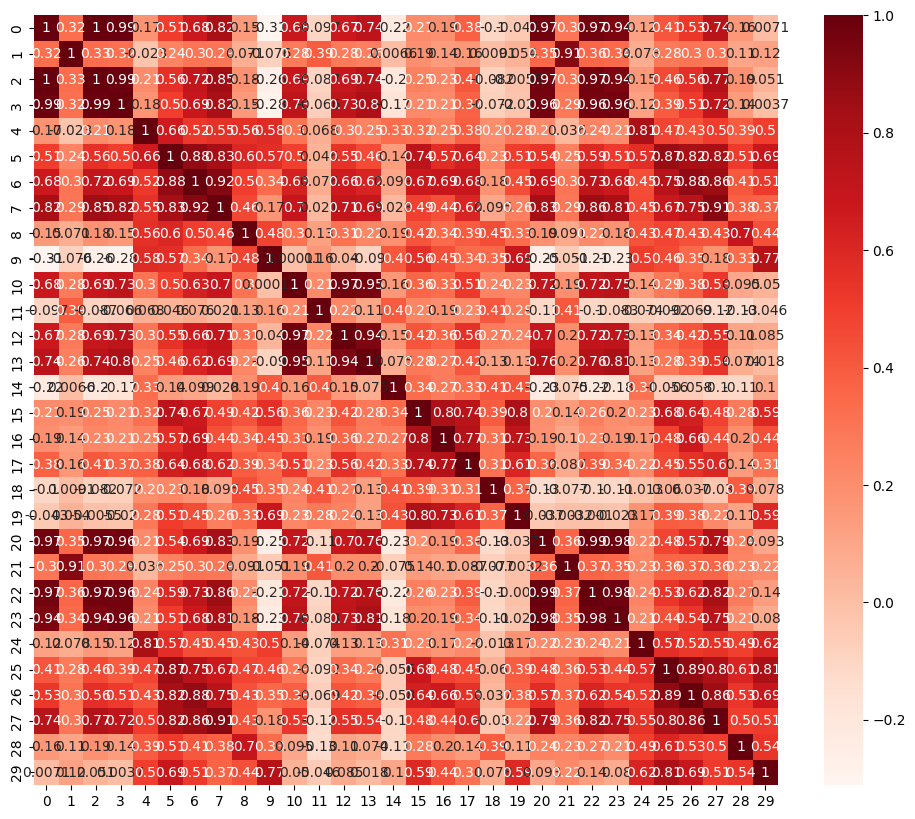

In [17]:
plt.figure(figsize=(12,10))

sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

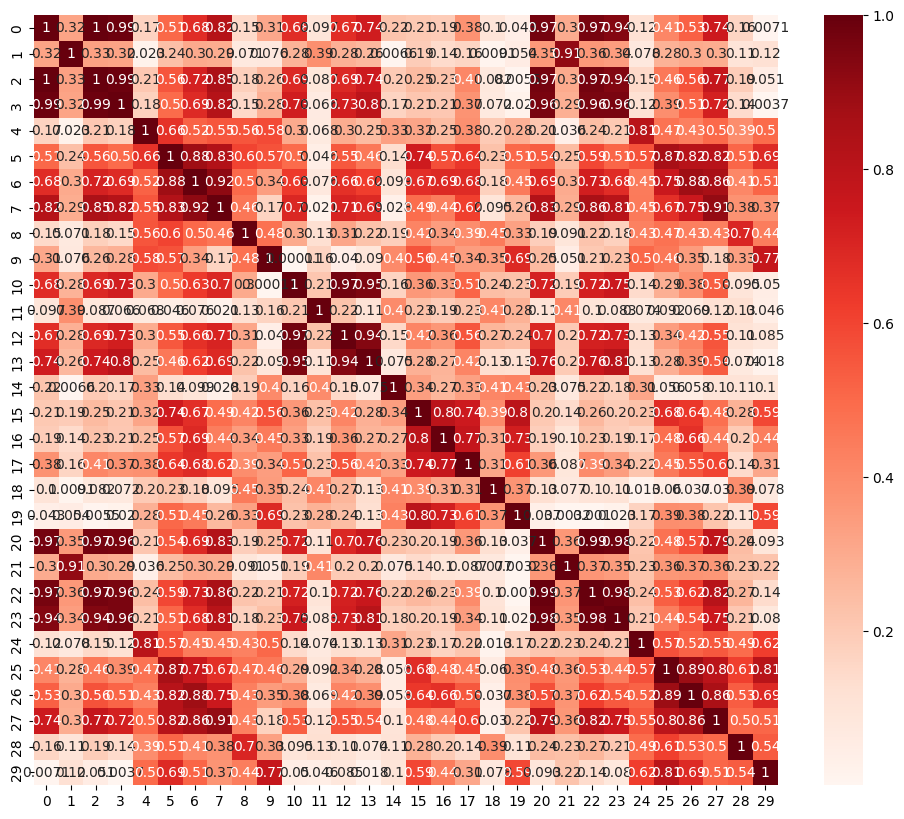

In [18]:
####  Using 
##Using  Pandas
df = pd.DataFrame(X)
# Create correlation matrix
corr_matrix = df.corr().abs()
#print(corr_matrix.shape)
plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)


[2, 3, 12, 13, 20, 22, 23]


In [20]:
df.drop(df[to_drop], axis=1)

,0,1,4,11,14,18
0,17.99,10.38,0.11840,0.9053,0.006399,0.03003
1,20.57,17.77,0.08474,0.7339,0.005225,0.01389
2,19.69,21.25,0.10960,0.7869,0.006150,0.02250
3,11.42,20.38,0.14250,1.1560,0.009110,0.05963
4,20.29,14.34,0.10030,0.7813,0.011490,0.01756
...,...,...,...,...,...,...
564,21.56,22.39,0.11100,1.2560,0.010300,0.01114
565,20.13,28.25,0.09780,2.4630,0.005769,0.01898
566,16.60,28.08,0.08455,1.0750,0.005903,0.01318
567,20.60,29.33,0.11780,1.5950,0.006522,0.02324
